<a href="https://colab.research.google.com/github/rajeshchengannur/MachineLearning/blob/main/svm_census.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np

In [7]:
original_data = pd.read_csv("adult.csv",names =["Age","Workclass","fnlwgt","Education","Education-Num","Marital Status","Occupation","RelationShip",
"Race","Gender","Capital Gain","Capital Loss","Hours per week","Country","Target"],sep=r'\s*,\s*',
engine='python',na_values="?")

In [8]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-Num   32561 non-null  int64 
 5   Marital Status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   RelationShip    32561 non-null  object
 8   Race            32561 non-null  object
 9   Gender          32561 non-null  object
 10  Capital Gain    32561 non-null  int64 
 11  Capital Loss    32561 non-null  int64 
 12  Hours per week  32561 non-null  int64 
 13  Country         31978 non-null  object
 14  Target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
original_data.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,RelationShip,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


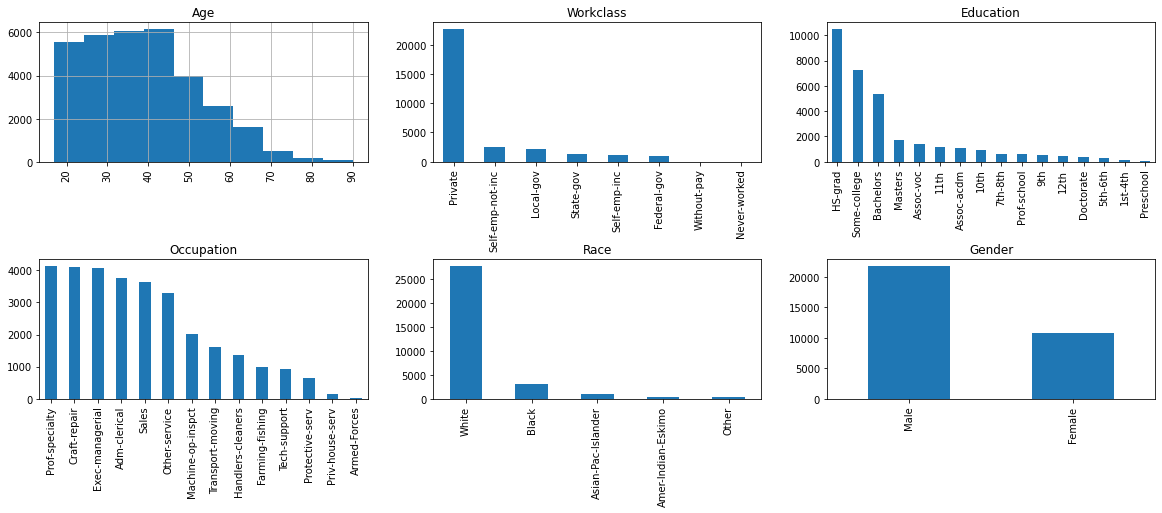

In [10]:
#One way to analyze the data is graphically
import matplotlib.pyplot as plt
import math
%matplotlib inline
fig = plt.figure(figsize=(20,20))
cols =3
rows = math.ceil(float(original_data.shape[1])/cols)

for i,column in enumerate(["Age","Workclass","Education","Occupation","Race","Gender"]):
  ax = fig.add_subplot(rows,cols,i+1)
  ax.set_title(column)
  if original_data.dtypes[column] == np.object:
    original_data[column].value_counts().plot(kind= "bar", axes=ax)
  else:
    original_data[column].hist(axes=ax)
    plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7,wspace=0.2)
plt.show()

In [11]:
#Use LabelEncoder to transform text to Numeric. For ML, we have to convert text data to numeric
import sklearn.preprocessing as preprocessing
le = preprocessing.LabelEncoder()
original_data['Occupation'] = le.fit_transform(original_data['Occupation'].astype(str))

In [12]:
original_data.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,RelationShip,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,0,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,3,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,5,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,5,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,9,Wife,Black,Female,0,0,40,Cuba,<=50K


In [13]:
#Convert the target field , that is also label
original_data['Target'] = le.fit_transform(original_data['Target'].astype(str))
original_data.tail()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,RelationShip,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,12,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,6,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,0,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,0,Own-child,White,Male,0,0,20,United-States,0
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,3,Wife,White,Female,15024,0,40,United-States,1


In [14]:
original_data['Target'].unique()  # Check wether other values are present

array([0, 1])

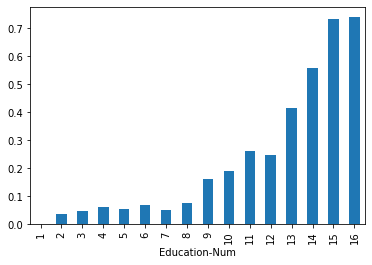

In [15]:
original_data.groupby('Education-Num').Target.mean().plot(kind='bar')
plt.show()
# No of years of education can seems to corelate very highly with target

In [16]:
from sklearn.model_selection import train_test_split
#Taking only the No of features which are important for now
X = original_data[['Education-Num','Occupation']]
y = original_data['Target']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=0)

In [17]:
from sklearn.svm import SVC  # C support vector classification
#Declaring SVC with no tuning
classifier = SVC()
# Fitting the data , SVM will start learning
classifier.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
#Predicting the result and the accuracy
score = classifier.score(x_test,y_test)
print(score)

0.7861200675571933


<function matplotlib.pyplot.show>

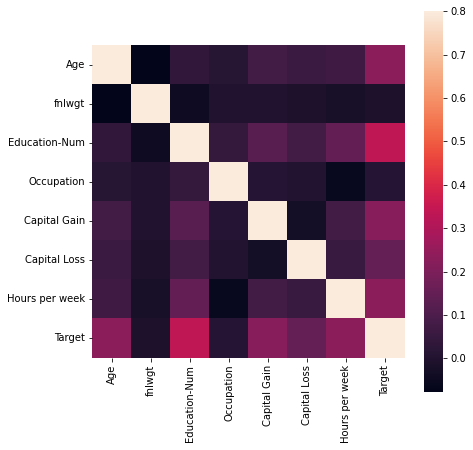

In [20]:
# Just see how the fields in our datasets are corelated
import seaborn as sns
corrmat = original_data.corr()
f,ax = plt.subplots(figsize=(7,7))
sns.heatmap(corrmat ,vmax=0.8,square =True)
plt.show

In [21]:
# Some of the fields are missing in the heatmap becuase those are text fields. We need to convert to numeric
original_data['Race'] = le.fit_transform(original_data['Race'].astype(str))
original_data['Gender'] = le.fit_transform(original_data['Gender'].astype(str))
original_data['Marital Status'] = le.fit_transform(original_data['Marital Status'].astype(str))
original_data['Education'] = le.fit_transform(original_data['Education'].astype(str))


<function matplotlib.pyplot.show>

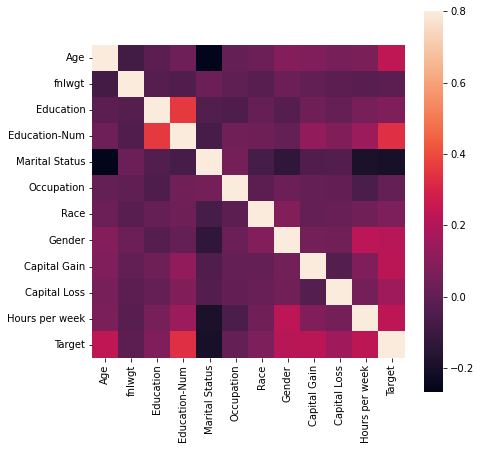

In [22]:
corrmat = original_data.corr()
f,ax = plt.subplots(figsize=(7,7))
sns.heatmap(corrmat ,vmax=0.8,square =True)
plt.show

<function matplotlib.pyplot.show>

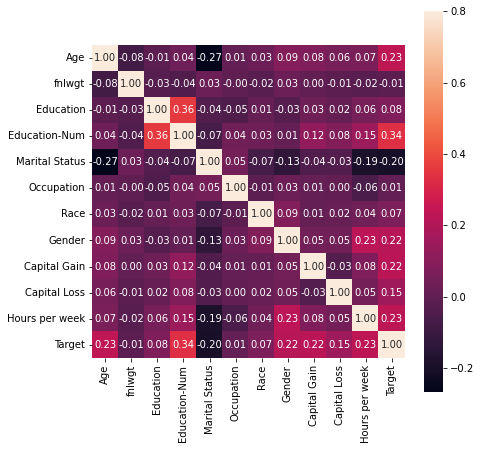

In [23]:
f,ax = plt.subplots(figsize=(7,7))
sns.heatmap(corrmat ,vmax=0.8,square =True, annot=True,fmt='0.2f')
plt.show

In [26]:
#While checking , It seems like age,Gender is also correlated with the target . Lets include and see the score
#Taking only the No of features which are important for now
X = original_data[['Education-Num','Occupation','Age','Gender']]
y = original_data['Target']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=0)

classifier = SVC()
# Fitting the data , SVM will start learning
classifier.fit(x_train,y_train)
#Predicting the result and the accuracy
score = classifier.score(x_test,y_test)
print(score)


0.7953324120988792


In [28]:
#Lets improve this by little bit of tuning #Radial basis function
classifier = SVC(kernel ='rbf',C=1.0) 
# Fitting the data , SVM will start learning
classifier.fit(x_train,y_train)
#Predicting the result and the accuracy
score = classifier.score(x_test,y_test)
print(score)

0.7953324120988792


In [29]:
#There is no change becuse the C value is the default value. Lets tweak it and see
classifier = SVC(kernel ='rbf',C=10.0) 
# Fitting the data , SVM will start learning
classifier.fit(x_train,y_train)
#Predicting the result and the accuracy
score = classifier.score(x_test,y_test)
print(score)

0.7968678028558268


In [30]:
# We can tweek the parameter to get a better accuracy. This is called hyper parameter tuning

#Lets try with linear kernal
classifier = SVC(kernel ='linear',C=1.0) 
# Fitting the data , SVM will start learning
classifier.fit(x_train,y_train)
#Predicting the result and the accuracy
score = classifier.score(x_test,y_test)
print(score)

0.796714263780132


In [ ]:
# Not much difference.  The only problem is with SVM , Cant understand the relationship between the input and output
#This can be achived with the help of Descition Trees
